### Dont edit this



In [1]:
import requests
import matplotlib.pylab as plt
import json

# Helper
def name_to_b58(hotspot_name):
    return list(filter(lambda x: '-'.join(x['name'].lower().split(' ')) == hotspot_name,
                       HOTSPOTS))[0]['address']

def b58_to_name(hb58):
    return list(filter(lambda x: x['address'] == hb58, HOTSPOTS))[0]['name']

def get_witnesses_by_name(hname):
    hotspot = name_to_b58(hname)

    witness_resp = requests.get('{}/witnesses/{}'.format(API, hotspot))
    assert(witness_resp.status_code == 200)

    witnesses = witness_resp.json()['data']
    return witnesses

def get_witnesses(hb58):
    witness_resp = requests.get('{}/witnesses/{}'.format(API, hb58))
    assert(witness_resp.status_code == 200)

    witnesses = witness_resp.json()['data']
    return witnesses

def get_path(challenge_id):
    challenge_resp = requests.get('{}/challenges/{}'.format(API, challenge_id))
    assert(challenge_resp.status_code == 200)
    
    path = challenge_resp.json()['data']['pathElements']
    addresses = [p['address'] for p in path]
    return addresses

def plot_single_witness_by_name(hname, wname):
    witnesses = get_witnesses_by_name(hname)
    for witness in witnesses:
        if '-'.join(witness['name'].lower().split(' ')) == wname:
            hist = witness['hist']
            address = witness['address']
            w_name = witness['name']
            print("{} has witnessed {} at these RSSI values".format(wname, hname))
            # print(w_name)
            # print(hist)
            plt.bar(range(len(hist)), list(hist.values()), align='center')
            plt.xticks(range(len(hist)), list(hist.keys()))
            plt.title('Histogram')
            plt.xlabel('Buckets')
            plt.ylabel('Counts')
            plt.show()
    return

def plot_single_witness(hb58, wb58):
    witnesses = get_witnesses(hb58)
    for witness in witnesses:
        if witness['address'] == wb58:
            hist = witness['hist']
            address = witness['address']
            w_name = witness['name']
            print("{} has witnessed {} at these RSSI values".format(w_name, b58_to_name(hb58)))
            # print(w_name)
            print(hist)
            plt.bar(range(len(hist)), list(hist.values()), align='center')
            plt.xticks(range(len(hist)), list(hist.keys()))
            plt.title('Histogram')
            plt.xlabel('Buckets')
            plt.ylabel('Counts')
            plt.show()
    return

# Constants, don't touch this
API = 'https://explorer.helium.foundation/api'
hotspots_resp = requests.get("{}/hotspots".format(API))
assert(hotspots_resp.status_code == 200)
HOTSPOTS = hotspots_resp.json()['data']

### Edit challenge_id to get path RSSI histograms

In [2]:
challenge_id = 1689995

In [3]:
path_b58_addrs = get_path(challenge_id)

In [4]:
path_b58_addrs

['112D3XJmbB4ouvhLkDcCJLe7HW8Ae4WFPzTcPDGQ4qE2Aiwwsqq3',
 '116Lq26mCAjEAKH55o6E5BnUQPGwZX1TUv9WrDS8xRyen4N5ct2',
 '112k9k4VAqfQAtYJGbgnVgvMjdR6FxYy3SmfRTmyeYptAna5ZBYJ',
 '11a9u2Dkh3LjkbXYiCH3dendQySrdhLGyYWJYUcLMspESnhczsk',
 '112NpqyB7Jq3SrmG8tbMwW6rwic8ftpkDFPsechdRzuLE59QSNmY',
 '112m48zP6UC1yCZkBtUn15vRUk38rPBqJQeoZdZvPHjL4a88uxkc',
 '112TYyiHFxgGa5oC7wuuwfXyKhWh8oeA5HpRKJvwMCUwBHCVjwgk']

In [5]:
path_names = [b58_to_name(i) for i in path_b58_addrs]
path_names

['Breezy Tangelo Nuthatch',
 'Melodic Cherry Hamster',
 'Tangy Shadow Halibut',
 'Bubbly Pastel Ant',
 'Wonderful Ceramic Wren',
 'Joyous Foggy Snail',
 'Joyful Rose Wallaby']

In [6]:
def plot_path_rssi_hist(path):
  path_length = len(path)
  i = 0
  while i < path_length:
      if i == path_length - 1:
          print('done')
      else:
          h = path[i]
          w = path[i + 1]
          plot_single_witness(h, w)
      i += 1
  return

Melodic Cherry Hamster has witnessed Breezy Tangelo Nuthatch at these RSSI values
{'-132': 0, '-123': 0, '-114': 2, '-105': 194, '-96': 298, '-88': 0, '-79': 0, '-70': 0, '-61': 0, '-52': 0, '28': 12}


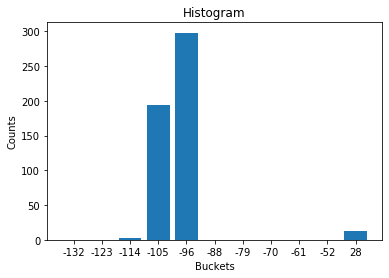

Tangy Shadow Halibut has witnessed Melodic Cherry Hamster at these RSSI values
{'-132': 0, '-122': 3, '-113': 0, '-104': 0, '-95': 77, '-86': 343, '-77': 0, '-68': 0, '-59': 0, '-50': 0, '28': 22}


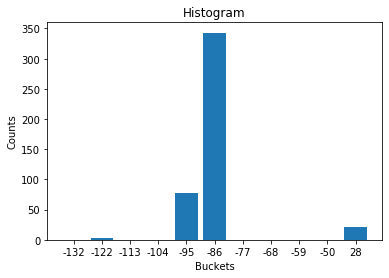

Bubbly Pastel Ant has witnessed Tangy Shadow Halibut at these RSSI values
{'-132': 0, '-124': 0, '-116': 0, '-108': 11, '-101': 68, '-93': 894, '-85': 36, '-77': 0, '-70': 0, '-62': 0, '28': 15}


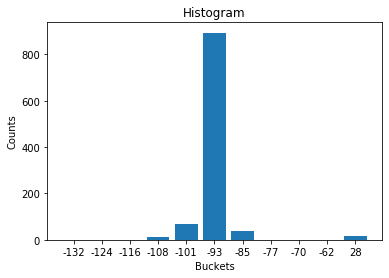

Wonderful Ceramic Wren has witnessed Bubbly Pastel Ant at these RSSI values
{'-132': 0, '-124': 0, '-116': 0, '-108': 75, '-100': 586, '-92': 323, '-84': 4, '-76': 0, '-68': 0, '-60': 0, '28': 44}


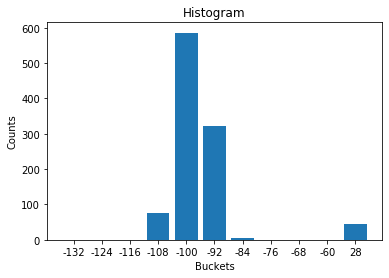

Joyous Foggy Snail has witnessed Wonderful Ceramic Wren at these RSSI values
{'-132': 0, '-123': 0, '-114': 17, '-106': 610, '-97': 580, '-88': 3, '-80': 0, '-71': 0, '-62': 0, '-54': 0, '28': 10}


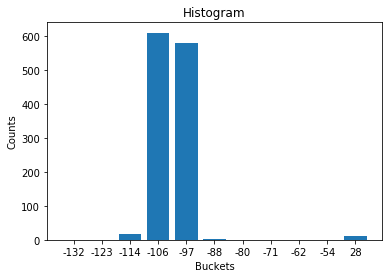

Joyful Rose Wallaby has witnessed Joyous Foggy Snail at these RSSI values
{'-132': 0, '-123': 299, '-115': 531, '-106': 75, '-98': 0, '-90': 0, '-81': 0, '-73': 0, '-64': 0, '-56': 0, '28': 43}


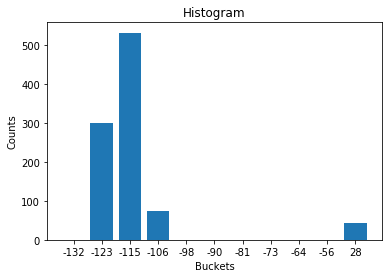

done


In [7]:
plot_path_rssi_hist(path_b58_addrs)

### Edit hotspot_name and witness_name to get RSSI hist

In [8]:
# For example
hotspot_name = "stale-iris-gecko"
witness_name = "innocent-jade-robin"

innocent-jade-robin has witnessed stale-iris-gecko at these RSSI values


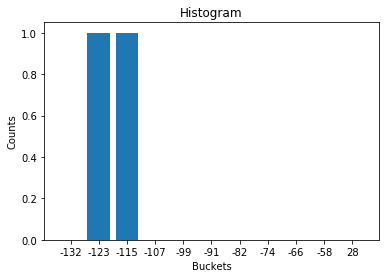

In [9]:
plot_single_witness_by_name(hotspot_name, witness_name)

### For getting ALL witness RSSIs

In [10]:
path_names

['Breezy Tangelo Nuthatch',
 'Melodic Cherry Hamster',
 'Tangy Shadow Halibut',
 'Bubbly Pastel Ant',
 'Wonderful Ceramic Wren',
 'Joyous Foggy Snail',
 'Joyful Rose Wallaby']

In [12]:
def plot_witnesses_for(name):
    witnesses = get_witnesses_by_name(name)

    for w in witnesses:
        hist = w['hist']
        address = w['address']
        name = w['name']
        print(hist)
        plt.bar(range(len(hist)), list(hist.values()), align='center')
        plt.xticks(range(len(hist)), list(hist.keys()))
        plt.title(name)
        plt.xlabel('Buckets')
        plt.ylabel('Counts')
        plt.show()

{'-132': 0, '-123': 3, '-115': 16, '-107': 50, '-99': 161, '-91': 59, '-83': 84, '-74': 54, '-66': 0, '-58': 0, '28': 6}


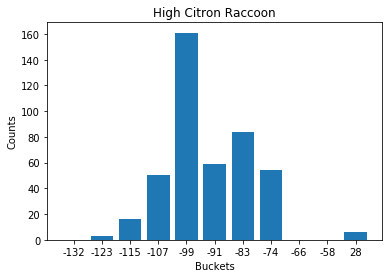

{'-132': 0, '-123': 1, '-115': 3, '-107': 44, '-99': 66, '-91': 15, '-83': 8, '-75': 3, '-67': 0, '-59': 0, '28': 2}


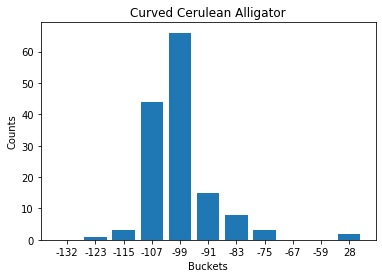

{'-132': 0, '-124': 1, '-117': 8, '-109': 10, '-102': 18, '-94': 19, '-87': 60, '-79': 54, '-72': 0, '-64': 0, '28': 1}


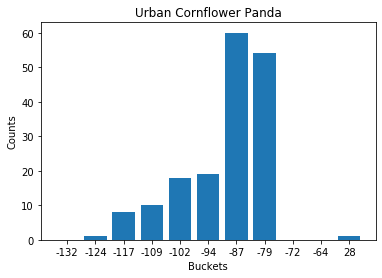

{'-132': 0, '-124': 0, '-116': 7, '-108': 26, '-101': 99, '-93': 108, '-85': 7, '-78': 6, '-70': 2, '-62': 0, '28': 8}


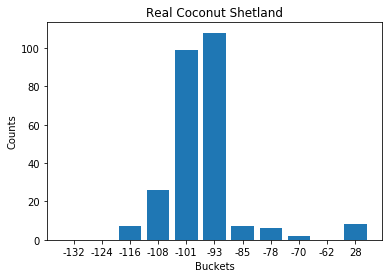

{'-132': 0, '-123': 2, '-114': 6, '-106': 54, '-97': 113, '-89': 129, '-80': 241, '-72': 13, '-63': 0, '-55': 0, '28': 15}


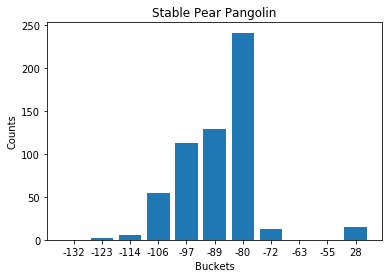

{'-132': 0, '-123': 5, '-115': 32, '-107': 21, '-99': 43, '-91': 219, '-83': 34, '-75': 7, '-67': 0, '-59': 0, '28': 7}


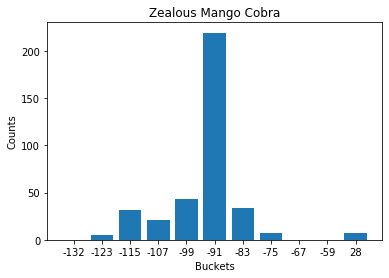

{'-132': 0, '-124': 1, '-116': 16, '-108': 23, '-100': 43, '-93': 121, '-85': 113, '-77': 3, '-69': 0, '-62': 0, '28': 3}


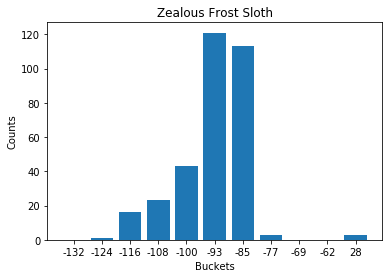

{'-132': 0, '-123': 2, '-115': 6, '-106': 43, '-98': 75, '-89': 138, '-81': 209, '-72': 8, '-64': 0, '-56': 0, '28': 7}


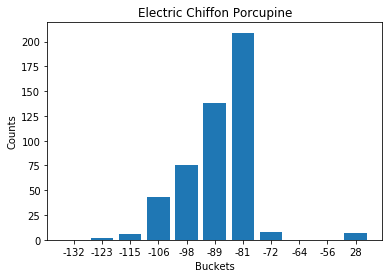

{'-132': 0, '-123': 1, '-114': 0, '-105': 9, '-96': 116, '-87': 206, '-78': 11, '-69': 0, '-60': 0, '-51': 0, '28': 2}


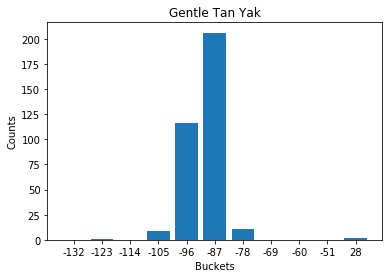

{'-132': 0, '-123': 1, '-114': 16, '-105': 32, '-96': 58, '-87': 112, '-78': 84, '-69': 4, '-60': 0, '-51': 0, '28': 1}


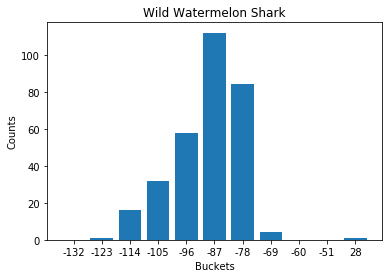

{'-132': 0, '-124': 0, '-116': 0, '-108': 9, '-100': 24, '-92': 47, '-84': 112, '-76': 1, '-68': 0, '-60': 0, '28': 1}


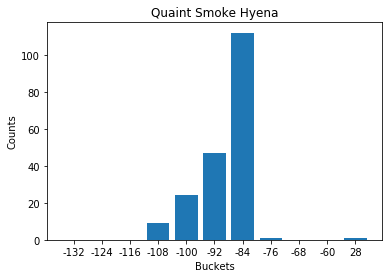

{'-132': 0, '-124': 0, '-116': 1, '-109': 32, '-101': 93, '-94': 113, '-86': 66, '-78': 7, '-71': 1, '-63': 0, '28': 1}


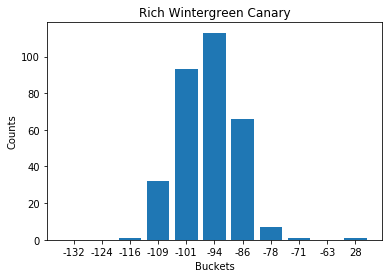

{'-132': 0, '-124': 6, '-117': 6, '-109': 6, '-102': 1, '-95': 2, '-87': 4, '-80': 1, '-73': 0, '-65': 0, '28': 0}


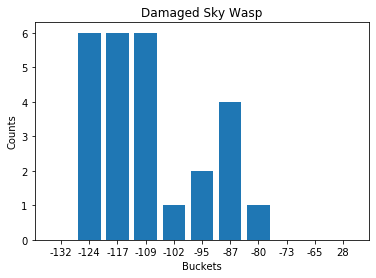

{'-132': 0, '-124': 0, '-116': 11, '-108': 37, '-100': 145, '-92': 114, '-84': 68, '-76': 99, '-68': 1, '-60': 0, '28': 6}


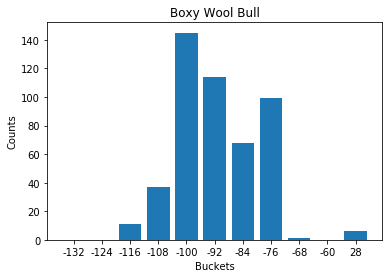

{'-132': 0, '-124': 1, '-116': 0, '-109': 4, '-101': 36, '-94': 69, '-86': 143, '-79': 46, '-71': 0, '-64': 0, '28': 2}


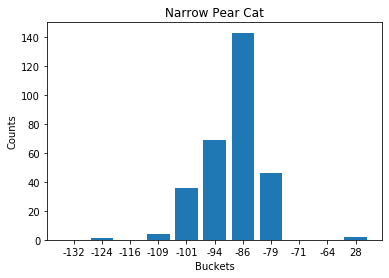

{'-132': 0, '-124': 0, '-116': 10, '-108': 14, '-100': 40, '-92': 99, '-84': 54, '-77': 12, '-69': 1, '-61': 0, '28': 1}


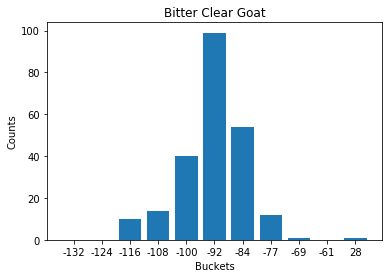

{'-132': 0, '-122': 2, '-113': 16, '-104': 86, '-95': 102, '-86': 121, '-77': 149, '-67': 10, '-58': 0, '-49': 0, '28': 11}


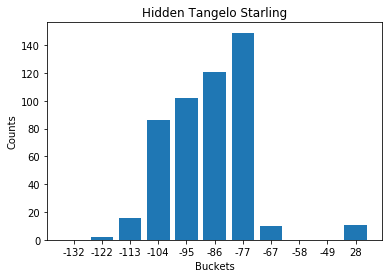

{'-132': 0, '-122': 8, '-113': 21, '-104': 124, '-95': 100, '-86': 91, '-76': 75, '-67': 52, '-58': 0, '-49': 0, '28': 1}


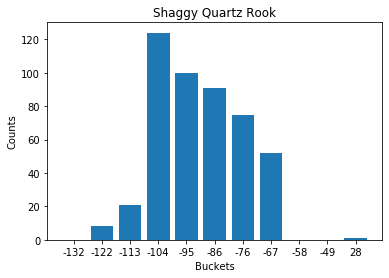

{'-132': 0, '-124': 0, '-116': 2, '-109': 5, '-101': 86, '-93': 183, '-86': 52, '-78': 3, '-70': 0, '-63': 0, '28': 2}


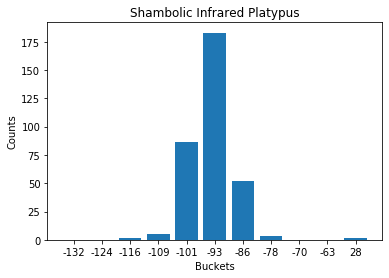

{'-132': 0, '-123': 3, '-115': 11, '-107': 95, '-99': 37, '-91': 25, '-83': 9, '-74': 0, '-66': 0, '-58': 0, '28': 1}


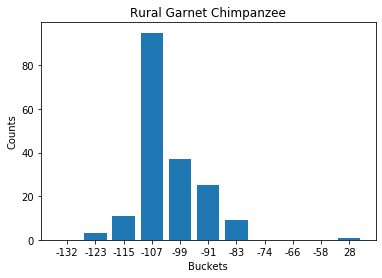

In [14]:
plot_witnesses_for("daring-citron-newt")

{'-132': 0, '-123': 2, '-115': 4, '-106': 26, '-98': 68, '-89': 102, '-81': 53, '-73': 27, '-64': 0, '-56': 0, '28': 4}


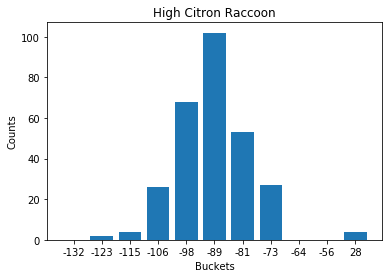

{'-132': 0, '-123': 1, '-114': 3, '-105': 17, '-97': 74, '-88': 23, '-79': 6, '-70': 1, '-62': 0, '-53': 0, '28': 2}


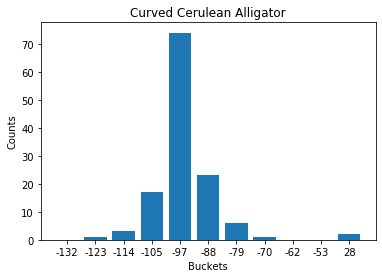

{'-132': 0, '-123': 0, '-115': 1, '-106': 1, '-98': 7, '-89': 52, '-81': 70, '-72': 17, '-64': 0, '-55': 0, '28': 2}


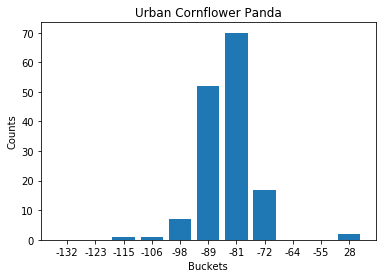

{'-132': 0, '-124': 0, '-116': 3, '-109': 12, '-101': 134, '-93': 89, '-86': 8, '-78': 11, '-71': 2, '-63': 0, '28': 8}


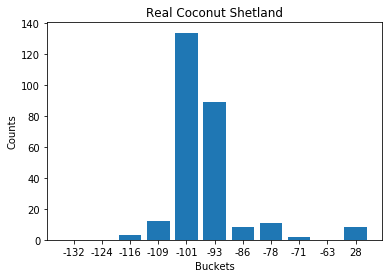

{'-132': 0, '-123': 0, '-115': 1, '-107': 1, '-98': 26, '-90': 68, '-82': 229, '-73': 118, '-65': 0, '-57': 0, '28': 14}


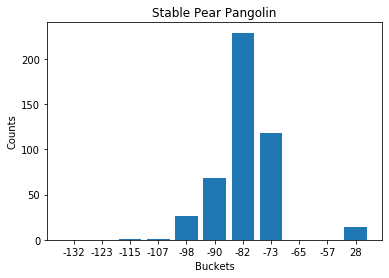

{'-132': 0, '-123': 0, '-114': 0, '-105': 5, '-96': 65, '-87': 114, '-78': 182, '-69': 1, '-60': 0, '-51': 0, '28': 13}


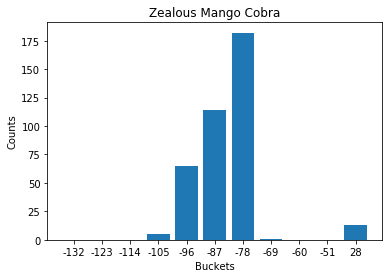

{'-132': 0, '-123': 1, '-115': 1, '-107': 1, '-99': 9, '-91': 37, '-83': 166, '-75': 156, '-67': 2, '-59': 0, '28': 6}


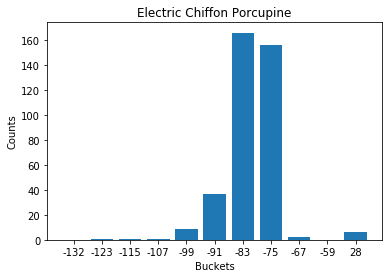

{'-132': 0, '-124': 0, '-116': 0, '-108': 0, '-100': 22, '-92': 99, '-84': 127, '-76': 61, '-68': 35, '-60': 0, '28': 3}


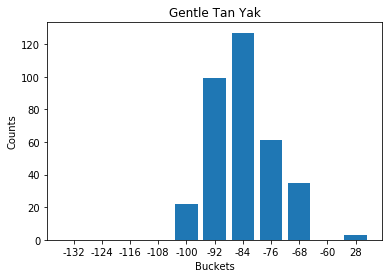

{'-132': 0, '-123': 0, '-115': 5, '-107': 18, '-99': 136, '-91': 91, '-83': 64, '-75': 44, '-67': 0, '-58': 0, '28': 3}


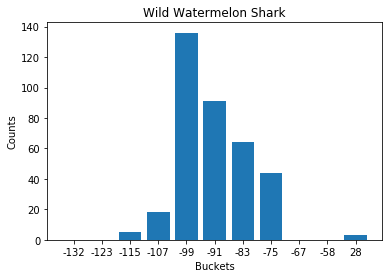

{'-132': 0, '-124': 0, '-116': 2, '-108': 15, '-100': 79, '-92': 89, '-84': 19, '-76': 1, '-68': 0, '-60': 0, '28': 3}


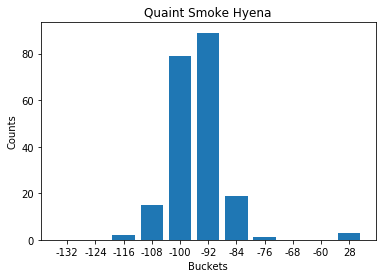

{'-132': 0, '-124': 1, '-116': 1, '-108': 1, '-100': 32, '-92': 122, '-84': 107, '-76': 43, '-68': 1, '-60': 0, '28': 2}


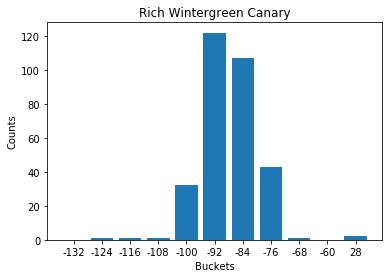

{'-132': 0, '-124': 6, '-117': 2, '-109': 6, '-102': 2, '-94': 2, '-87': 0, '-79': 6, '-72': 0, '-64': 0, '28': 1}


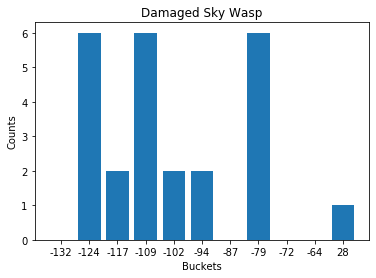

{'-132': 0, '-123': 0, '-115': 1, '-106': 8, '-98': 94, '-90': 153, '-81': 71, '-73': 34, '-65': 0, '-56': 0, '28': 2}


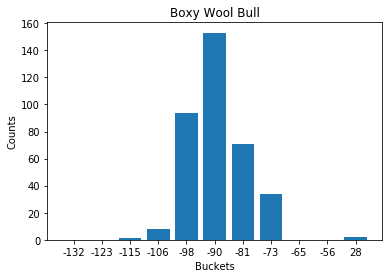

{'-132': 0, '-123': 1, '-115': 2, '-107': 0, '-99': 1, '-90': 43, '-82': 143, '-74': 92, '-66': 0, '-57': 0, '28': 1}


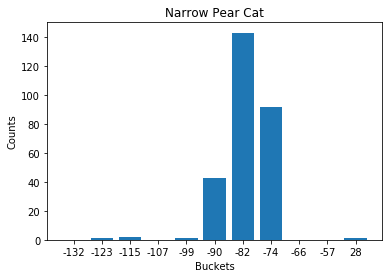

{'-132': 0, '-124': 0, '-116': 5, '-108': 33, '-100': 45, '-93': 141, '-85': 122, '-77': 4, '-69': 0, '-62': 0, '28': 0}


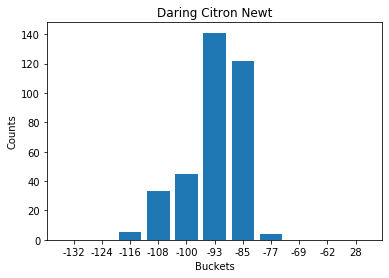

{'-132': 0, '-123': 0, '-114': 2, '-105': 5, '-96': 62, '-87': 119, '-78': 45, '-69': 0, '-60': 0, '-51': 0, '28': 4}


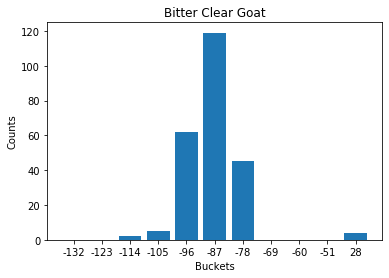

{'-132': 0, '-124': 0, '-116': 2, '-108': 2, '-101': 21, '-93': 46, '-85': 187, '-78': 47, '-70': 42, '-62': 0, '28': 1}


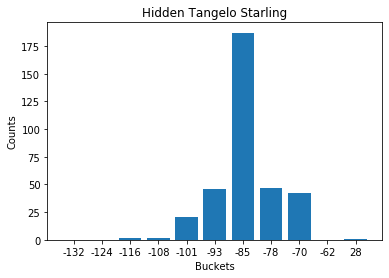

{'-132': 0, '-124': 0, '-116': 0, '-108': 6, '-100': 23, '-92': 112, '-84': 191, '-76': 44, '-68': 1, '-60': 0, '28': 3}


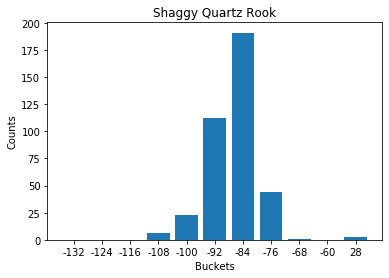

{'-132': 0, '-123': 1, '-114': 0, '-105': 13, '-97': 80, '-88': 72, '-79': 174, '-71': 4, '-62': 0, '-53': 0, '28': 0}


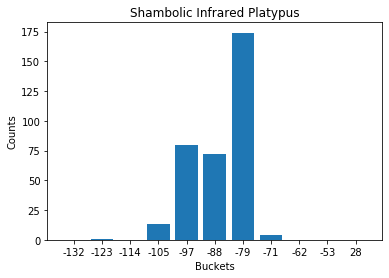

{'-132': 0, '-124': 0, '-116': 5, '-108': 24, '-101': 98, '-93': 46, '-85': 5, '-78': 2, '-70': 6, '-62': 0, '28': 2}


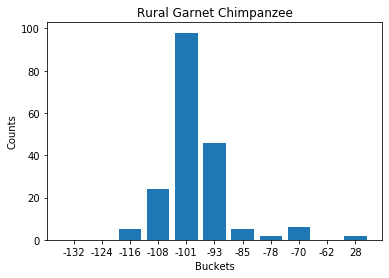

In [15]:
plot_witnesses_for("zealous-frost-sloth")

{'-132': 0, '-123': 1, '-114': 17, '-106': 54, '-97': 57, '-89': 111, '-80': 160, '-72': 18, '-63': 0, '-55': 0, '28': 2}


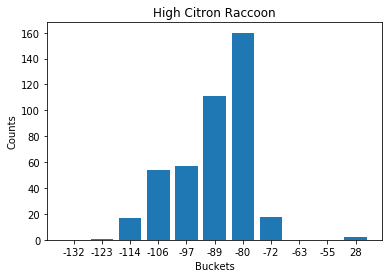

{'-132': 0, '-123': 0, '-115': 0, '-107': 2, '-99': 18, '-91': 73, '-83': 20, '-74': 10, '-66': 0, '-58': 0, '28': 0}


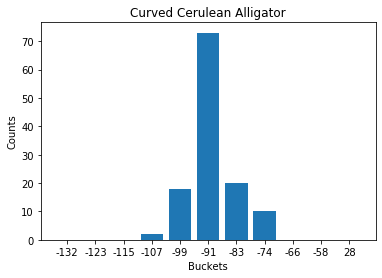

{'-132': 0, '-124': 1, '-116': 0, '-109': 2, '-101': 15, '-93': 18, '-86': 18, '-78': 17, '-71': 60, '-63': 3, '28': 2}


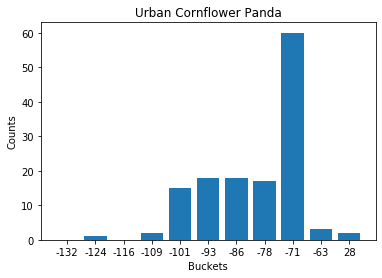

{'-132': 0, '-124': 0, '-116': 0, '-108': 8, '-100': 37, '-92': 148, '-84': 19, '-76': 1, '-68': 0, '-60': 0, '28': 9}


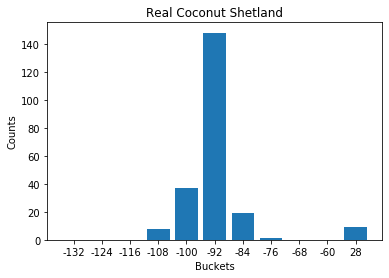

{'-132': 0, '-123': 21, '-114': 49, '-105': 20, '-96': 42, '-87': 114, '-78': 102, '-69': 150, '-60': 8, '-51': 0, '28': 12}


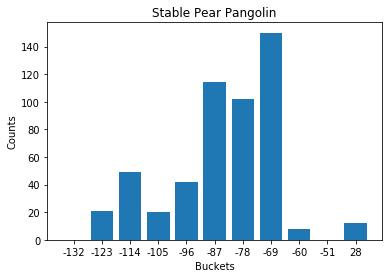

{'-132': 0, '-123': 0, '-115': 0, '-107': 0, '-98': 35, '-90': 172, '-82': 87, '-73': 50, '-65': 0, '-57': 0, '28': 8}


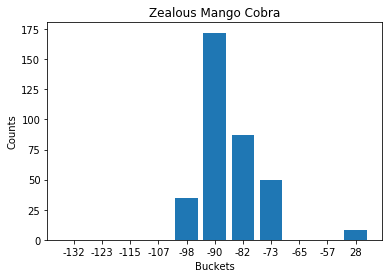

{'-132': 0, '-124': 0, '-116': 1, '-108': 3, '-100': 6, '-92': 103, '-84': 145, '-76': 36, '-68': 2, '-60': 0, '28': 2}


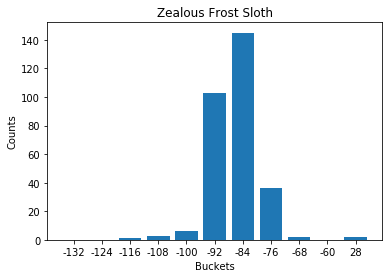

{'-132': 0, '-122': 2, '-113': 20, '-104': 91, '-95': 85, '-86': 48, '-77': 83, '-68': 115, '-59': 0, '-50': 0, '28': 3}


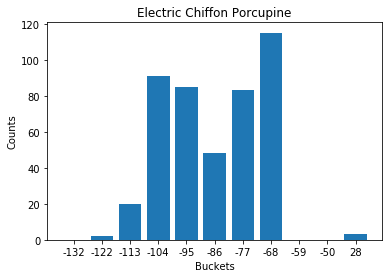

{'-132': 0, '-123': 0, '-114': 2, '-106': 3, '-97': 23, '-88': 104, '-80': 129, '-71': 31, '-62': 0, '-54': 0, '28': 1}


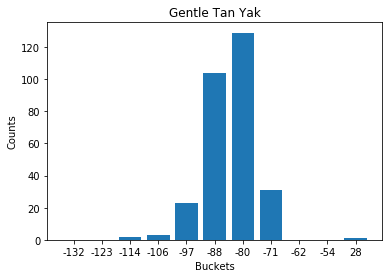

{'-132': 0, '-123': 1, '-114': 2, '-105': 19, '-96': 92, '-87': 70, '-78': 118, '-69': 15, '-60': 0, '-51': 0, '28': 1}


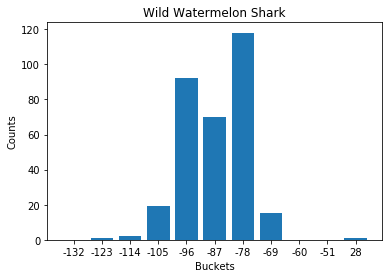

{'-132': 0, '-123': 0, '-115': 2, '-107': 7, '-98': 88, '-90': 65, '-82': 49, '-73': 2, '-65': 0, '-57': 0, '28': 2}


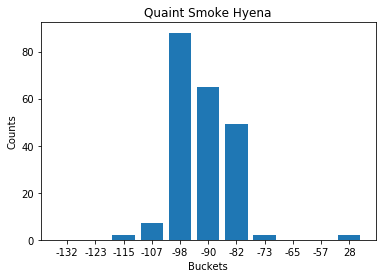

{'-132': 0, '-124': 0, '-116': 0, '-108': 7, '-100': 10, '-93': 78, '-85': 87, '-77': 46, '-69': 34, '-61': 0, '28': 2}


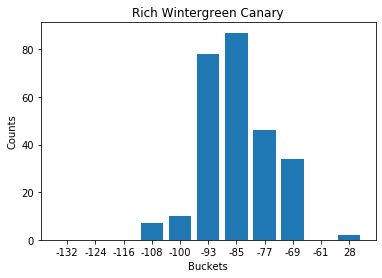

{'-132': 0, '-124': 4, '-116': 3, '-109': 1, '-101': 6, '-94': 5, '-86': 0, '-79': 0, '-71': 0, '-64': 0, '28': 0}


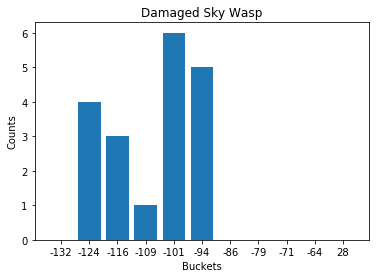

{'-132': 0, '-123': 7, '-115': 8, '-107': 24, '-99': 78, '-90': 75, '-82': 147, '-74': 102, '-66': 7, '-58': 0, '28': 0}


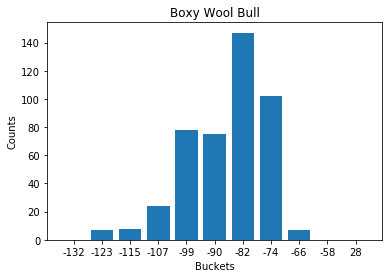

{'-132': 0, '-124': 0, '-116': 2, '-108': 2, '-101': 24, '-93': 79, '-85': 153, '-78': 35, '-70': 0, '-62': 0, '28': 1}


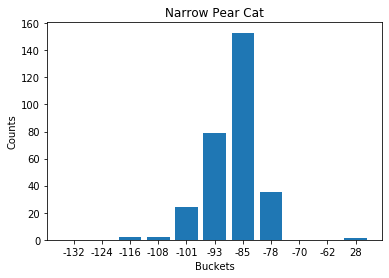

{'-132': 0, '-122': 8, '-113': 20, '-104': 125, '-95': 92, '-86': 92, '-76': 111, '-67': 21, '-58': 0, '-49': 0, '28': 0}


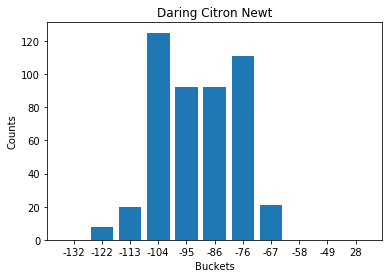

{'-132': 0, '-123': 0, '-115': 0, '-107': 9, '-99': 39, '-91': 66, '-83': 100, '-75': 6, '-67': 0, '-59': 0, '28': 2}


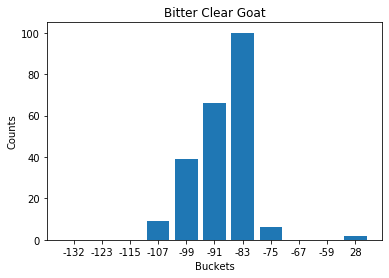

{'-132': 0, '-123': 11, '-114': 64, '-106': 19, '-97': 13, '-89': 130, '-80': 214, '-72': 27, '-63': 0, '-55': 0, '28': 17}


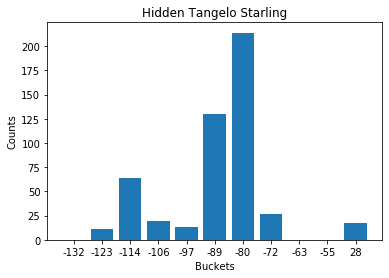

{'-132': 0, '-124': 0, '-116': 0, '-108': 1, '-100': 24, '-92': 165, '-84': 131, '-77': 25, '-69': 0, '-61': 0, '28': 1}


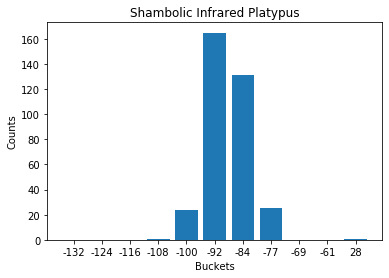

{'-132': 0, '-123': 0, '-115': 6, '-106': 51, '-98': 62, '-89': 26, '-81': 0, '-72': 0, '-64': 0, '-55': 0, '28': 1}


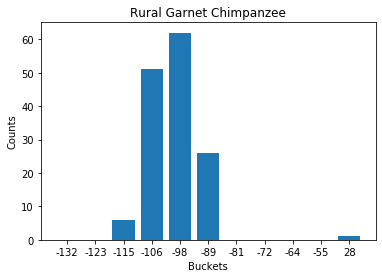

In [17]:
plot_witnesses_for("shaggy-quartz-rook")